In [10]:
# import packages

from __future__ import annotations

import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'statsmodels'

In [6]:
# set up base directory

data = pd.read_csv("../data/output/total_data.csv")

/tmp/ipykernel_3444433/3394398420.py:3: DtypeWarning: Columns (44,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/output/total_data.csv")


In [7]:
# observe data

data.head()

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,...,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,basic_premium,bid
0,H0028,1.0,19103.0,2014,2,238.0,2.828427,236.0,240.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,H0028,1.0,19113.0,2014,2,1334.5,4.949747,1331.0,1338.0,1338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,H0028,2.0,19153.0,2014,2,347.0,1.414214,346.0,348.0,346.0,...,744.91,49.83,2014.0,105.11,41.05,26.97,37.09,0.910,0.0,806.179654
3,H0028,3.0,19155.0,2014,2,173.0,11.313708,165.0,181.0,165.0,...,778.05,30.69,2014.0,110.04,43.02,29.06,37.96,0.983,0.0,844.788274
4,H0028,4.0,15003.0,2014,2,1019.5,20.506097,1005.0,1034.0,1034.0,...,720.07,48.97,2014.0,70.39,41.78,14.45,14.16,0.829,0.0,861.327751


In [12]:
# understand data
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,riskscore_partc,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,bid
count,340480.000000,340480.000000,340480.000000,340480.000000,159540.000000,156301.000000,159540.000000,159540.000000,159540.000000,159540.000000,...,305006.000000,305006.000000,305006.000000,305006.000000,257122.000000,257122.000000,257122.000000,257122.000000,257122.000000,292257.000000
mean,37.542458,30031.871358,2016.692049,0.928798,469.753199,19.115089,454.984449,484.696089,464.634085,473.359239,...,0.986555,751.285104,58.772866,2015.819981,106.345225,26.818077,53.126907,26.400241,0.971861,781.838941
std,67.953767,15344.936522,1.722344,0.995021,1780.727658,575.609349,1699.133800,1987.769929,1789.531509,1866.402791,...,0.159014,75.318391,48.732506,2.241238,39.193523,8.991191,25.049738,19.426616,0.124717,133.994488
min,1.000000,1001.000000,2014.000000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,0.398000,214.450000,0.000000,2014.000000,11.540000,0.010000,0.200000,0.000000,0.556000,190.571264
25%,4.000000,17107.000000,2015.000000,0.000000,31.000000,0.707107,30.000000,32.000000,31.000000,32.000000,...,0.886000,708.760000,22.640000,2014.000000,81.700000,19.760000,36.260000,13.820000,0.892000,705.693359
50%,17.000000,29181.000000,2017.000000,0.000000,88.500000,2.121320,86.000000,91.000000,87.000000,90.000000,...,0.986000,754.360000,52.000000,2014.000000,100.750000,25.760000,49.910000,23.000000,0.967000,773.939138
75%,48.000000,42095.000000,2018.000000,2.000000,294.500000,5.656854,286.000000,301.000000,290.000000,297.000000,...,1.082000,800.230000,84.890000,2018.000000,123.450000,34.390000,65.570000,33.920000,1.038000,850.186104
max,999.000000,56045.000000,2019.000000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,2.232000,1053.100000,461.520000,2019.000000,497.010000,70.170000,335.430000,226.840000,2.311000,1881.786543


In [14]:
data.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

## Question 1

/tmp/ipykernel_3444433/3310980444.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])


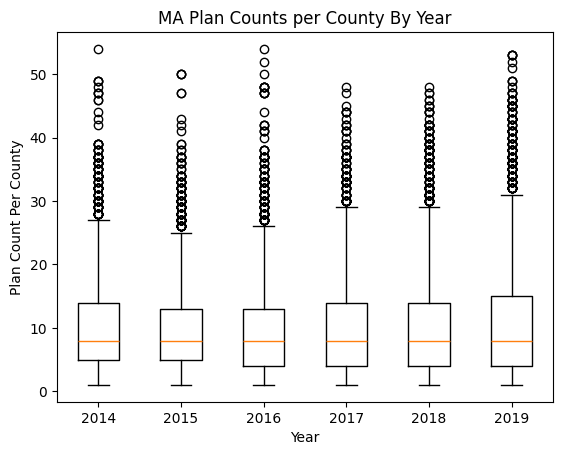

In [30]:
data["planid_num"] = pd.to_numeric(data["planid"], errors="coerce")
data["year"] = pd.to_numeric(data["year"], errors="coerce")

# Remove SNPs, 800-series, prescription only
data = data[data["snp"] != "Yes"]
data = data[~data["planid_num"].between(800, 899, inclusive="both")]
data = data[~((data["partd"] == "Yes") & (data["premium_partc"].isna()))]

# Keep valid counties and years
data["fips"] = pd.to_numeric(data["fips"], errors="coerce")
data = data[data["fips"].notna()]
data = data[data["year"].between(2014, 2019)]

# count plans
data["plan_key"] = data["contractid"].astype(str) + "-" + data["planid_num"].astype("Int64").astype(str)

plan_counts = (
    data.groupby(["year", "fips"])["plan_key"]
      .nunique()
      .reset_index(name="n_plans")
)

# create boxplot
years = sorted(plan_counts["year"].unique())
data_by_year = [
    plan_counts.loc[plan_counts["year"] == y, "n_plans"].values
    for y in years
]

plt.figure()
plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])
plt.xlabel("Year")
plt.ylabel("Plan Count Per County")
plt.title("MA Plan Counts per County By Year")
plt.show()

I believe that the number of plans per county is appropriate, but should have exhibited more growth over time. Because with a median of 10 plans year after year along with no growth from 2014, 2019, consumers are left with little flexibility in the long run. However, the outliers with 30-40+ plans likely feel overwhelmed by the high number of options, making a favorable number of plans around 8-12 to ensure availability of many options without causing burdensome decision making.

## Question 2

In [38]:
from pathlib import Path
Path(".").resolve()
list(Path("..").iterdir())
list(Path("../data").iterdir())


[PosixPath('../data/output')]

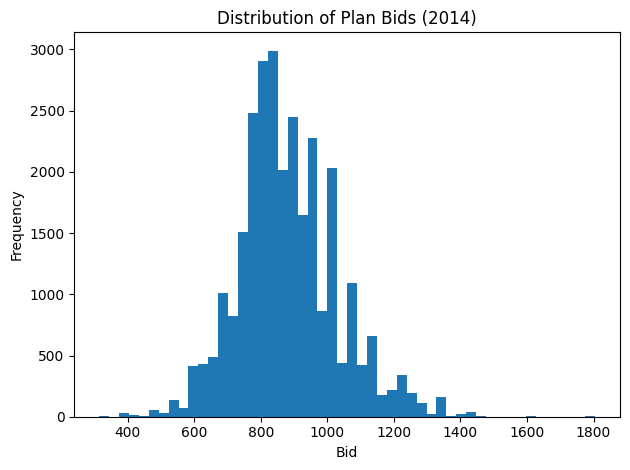

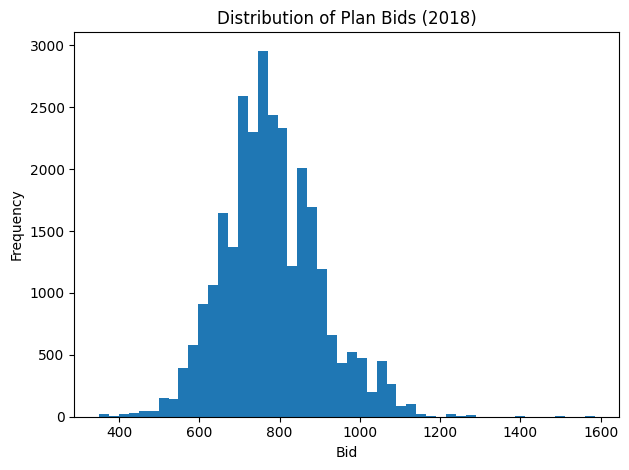

In [46]:
# risk rebate for all years

for x in ["rebate_partc", "premium", "premium_partc", "payment_partc", "riskscore_partc", "bid"]:
    if x in data.columns:
        data[x] = pd.to_numeric(data[x], errors="coerce")

# compute basic premium
data["basic_premium_recalc"] = np.where(
    data["rebate_partc"] > 0,
    0,
    np.where(
        (data["partd"] == "No") & data["premium"].notna() & data["premium_partc"].isna(),
        data["premium"],
        data["premium_partc"]
    )
)

# add bid
data["bid_recalc"] = np.nan
valid_risk = data["riskscore_partc"].notna() & (data["riskscore_partc"] != 0)

mask1 = valid_risk & (data["rebate_partc"] == 0) & (data["basic_premium_recalc"] > 0)
data.loc[mask1, "bid_recalc"] = (
    (data.loc[mask1, "payment_partc"] + data.loc[mask1, "basic_premium_recalc"])
    / data.loc[mask1, "riskscore_partc"]
)

mask2 = valid_risk & ((data["rebate_partc"] > 0) | (data["basic_premium_recalc"] == 0))
data.loc[mask2, "bid_recalc"] = (
    data.loc[mask2, "payment_partc"] / data.loc[mask2, "riskscore_partc"]
)

# create histograms for 2014 and 2018
def plot_bid_hist(df, year, bid_col="bid_recalc", bins=50):
    x = df.loc[df["year"] == year, bid_col].dropna()
    plt.figure()
    plt.hist(x, bins=bins)
    plt.title(f"Distribution of Plan Bids ({year})")
    plt.xlabel("Bid")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_bid_hist(data, 2014, bid_col="bid_recalc", bins=50)
plot_bid_hist(data, 2018, bid_col="bid_recalc", bins=50)

In [51]:
# summary stats
def bid_summary(df, year, bid_col="bid_recalc"):
    x = df.loc[df["year"] == year, bid_col].dropna()
    return pd.Series({
        "n": x.shape[0],
        "mean": x.mean(),
        "median": x.median(),
        "p10": x.quantile(0.10),
        "p90": x.quantile(0.90),
        "min": x.min(),
        "max": x.max(),
        "range": x.max() - x.min(),
        "std": x.std()
    })

bid_stats = pd.DataFrame(
    [bid_summary(data, 2014), bid_summary(data, 2018)],
    index=[2014, 2018]
)
bid_stats

,n,mean,median,p10,p90,min,max,range,std
2014,28605.0,881.444860,862.614913,704.590476,1075.829847,313.924915,1805.034169,1491.109254,149.266779
2018,28450.0,780.372061,769.288175,636.505032,939.047059,350.218023,1584.731405,1234.513382,122.321988


The distribution of plan bids has become more centered over time, with the range decreasing from 1491 to 1235 and the standard deviation decreasing from 149 to 122. The number of plans have decreased slightly. The bids have also shifted to the left, with the mean decreasing from 881 to 780.